### Problem 1.
#### symbolic differentiaion

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

import scipy.linalg as la

import sympy as sy
from sympy.abc import a, x, y

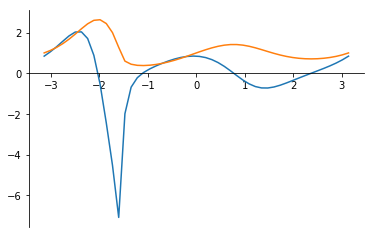

In [8]:
def diff_x(vals):
    f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    fx = sy.diff(f, x)
    
    fx_lamb = sy.lambdify(x, fx, 'numpy')
    f_lamb = sy.lambdify(x, f, 'numpy')
    
    
    fun_vals = fx_lamb(vals)# for val in vals]
    derv_vals = f_lamb(vals)# for val in vals]
    
    return fun_vals, derv_vals

vals = np.linspace(-np.pi, np.pi, 50)
level, derv = diff_x(vals)

fig, ax = plt.subplots()
ax.plot(vals, level)
ax.plot(vals, derv)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
plt.show()

### Probem 2.
numerical differentiation 

In [9]:
def forward_diff(f, x_0, h):
    order_1 = (f(x_0 + h) -f(x_0))/h
    order_2 = (-3*f(x_0) + 4* f(x_0 + h) - f(x_0 + 2*h))/(2*h)
    return order_1, order_2

In [10]:
def backward_diff(f, x_0, h):
    order_1 = (-f(x_0 - h) + f(x_0))/h
    order_2 = (3*f(x_0) - 4* f(x_0 - h) + f(x_0 - 2*h))/(2*h)
    return order_1, order_2

def centered_diff(f, x_0, h):
    order_1 = (-f(x_0 - h) + f(x_0 + h))/(2*h)
    
    top_2 = (f(x_0 - 2*h) - 8*f(x_0-h) +
             8*f(x_0 + h)- f(x_0+2*h))
    bottom_2 = 12*h
    order_2 = top_2 / bottom_2
    return order_1, order_2

In [11]:
f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))
vals = np.linspace(-np.pi, np.pi, 50)
h = 1e-4

In [12]:
a, b = forward_diff(f, vals, h)
c, d = backward_diff(f, vals, h)
e, k = centered_diff(f, vals, h)

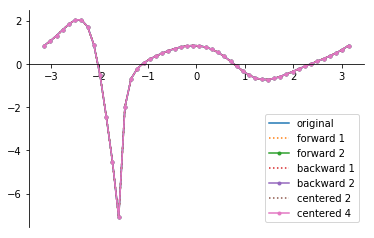

In [13]:
fig, ax = plt.subplots()
ax.plot(vals, level, label='original')
ax.plot(vals, a, ":", label='forward 1')
ax.plot(vals, b, ".-", label='forward 2')
ax.plot(vals, c, ":",label='backward 1')
ax.plot(vals, d, ".-",label='backward 2')
ax.plot(vals, e, ":",label='centered 2')
ax.plot(vals, k, ".-",label='centered 4')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
plt.legend()
plt.show()

They're all the same.

### Probem 3.
compute the errors of the derivatives

In [14]:
def diff_point(val):
    f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    fx = sy.diff(f, x)
    
    fx_lamb = sy.lambdify(x, fx)
    
    derv_vals = fx_lamb(val)
    
    return derv_vals

In [15]:
def compare_errors(x_0):
    f = lambda x: (np.sin(x) + 1)**(np.sin(np.cos(x)))
    actual = diff_point(x_0)
    hs = np.logspace(-8, 0, 9)
    
    f1, f2 = forward_diff(f, x_0, hs)
    b1, b2 = backward_diff(f, x_0, hs)
    c2, c4, = centered_diff(f, x_0, hs)
    
    diffs = [f1, f2, b1, b2, c2, c4]
    lb = ['f1', 'f2', 'b1', 'b2', 'c2', 'c4']
    
    
    plt.figure()
    for i, vals in enumerate(diffs):
        error = np.abs(actual - vals)
        plt.loglog(hs, error, '.-', label=lb[i])
    plt.legend()
    plt.show();
    

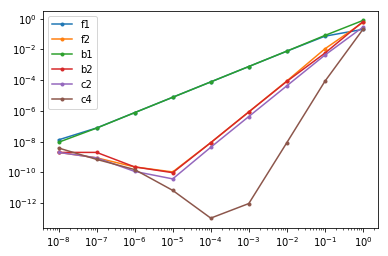

In [16]:
compare_errors(1)

### Problem 4.
#### compute plane speed from measured angles

In [17]:
t, alpha, beta = np.load(r"C:\Users\Max\Documents\BootCamp2017\Computation\Wk4_DifIntOpt\plane.npy").T

In [18]:
def plane_speed(alpha, beta, T):
    a = 500
    h = 1
    rad_a = np.deg2rad(alpha)
    rad_b = np.deg2rad(beta)
    
    x_pos = a * (np.tan(rad_b))/(np.tan(rad_b) - np.tan(rad_a))
    y_pos = a *( (np.tan(rad_b) * np.tan(rad_a))
                /(np.tan(rad_b) - np.tan(rad_a)))
    
    x_p = np.zeros(len(T)-2)
    y_p = np.empty_like(x_p)
    for i in range(len(T)-2):
        t = T[i]
        x_p[i] = (x_pos[i+h] - x_pos[i-h]) / (2*h)
        y_p[i] = (y_pos[i+h] - y_pos[i-h]) / (2*h)
    
    
    speed = np.sqrt(x_p**2 + y_p**2)
    return speed

In [20]:
speed = plane_speed(alpha, beta, t)
print('speed of the plane:', speed)

speed of the plane: [ 151.20970942   47.00103938   48.99880514   50.09944163   48.29035084
   51.56455905]


### Problem 5.
#### higher order numerical differentiation

In [21]:
def fun(vals):
    vals = np.array([vals[0]**2, vals[0]**3 - vals[1]])
    return vals

In [22]:
def jacob_multi(fun, x_0):
    h=1e-5
    
    f_len = len(fun(x_0))
    I = np.identity(f_len)
    jacob = np.zeros((f_len, len(x_0)))
    for col in range(len(I)):
        e = I[col,:]
        fh = fun(x_0 + h*e)
        fh_neg = (fun(x_0 - h*e))
        for row, var in enumerate(x_0):
            jacob[row, col] = ((fh[row] - fh_neg[row])/
                               (2*h))
    return jacob

In [23]:
values = np.array([1, 1])
jacob_multi(fun, values)

array([[ 2.,  0.],
       [ 3., -1.]])

... which is the correct Jacobian.

### Problem 6.
#### differentiation with Autograd-Package

In [24]:
from autograd import grad
import autograd.numpy as anp
import time

from sympy import log, sin, sqrt

In [28]:
def compare_diffs(x_val):
    x_0 = float(x_val)
    x = sy.symbols('x')
    f_sym = log(sqrt(sin(sqrt(x))))
    
    f_auto = lambda b: anp.log(anp.sqrt(anp.sin(anp.sqrt(b))))
    
    f = lambda b: np.log(np.sqrt(np.sin(np.sqrt(b))))
    
    def center_diff(f, x_0, h=1e-5):
        top_2 = (f(x_0 - 2*h) - 8*f(x_0-h) +
             8*f(x_0 + h)- f(x_0+2*h))
        bottom_2 = 12*h
        order_2 = top_2 / bottom_2
        return order_2
    
    sym_start = time.clock()
    sy_diff = sy.diff(f_sym, x)
    sy_diff = sy.lambdify(x, sy_diff)
    actual = (sy_diff(x_0))
    symtime =  time.clock() -sym_start
    
    auto_start = time.clock()
    auto_diff = grad(f_auto)
    auto_val = auto_diff(x_0)
    autotime = time.clock() - auto_start 
    auto_error = np.abs(auto_val - actual)
    
    start_time = time.clock()
    center2 = center_diff(f, x_0)
    centertime = time.clock() - start_time
    center_error = abs(center2 - actual)
    
    print('\t\tspeed\t\t\terror\nsympy:\t ',symtime,'\nautograd:',
          autotime,auto_error,'\ncenter2: ',
          centertime,center_error, )

In [29]:
compare_diffs(np.pi/4)

		speed			error
sympy:	  0.0053997906689033925 
autograd: 0.00028205325708086093 5.55111512313e-17 
center2:  2.3787624101601068e-05 3.96582766626e-12


### Problem 7.

In [138]:
from autograd import elementwise_grad

def taylor_sin(x, tol=.0001):
    result = 0
    cur_term = x
    i = 0
    while anp.abs(cur_term) >= tol:
        cur_term = (x**(2*i+1)*
                    (((-1)**i) / np.math.factorial(2*i +1)))
        result += cur_term
        i += 1
    return result

def plot_derivatives():
    
    first_derv = grad(taylor_sin)
    second_derv = grad(first_derv)
    
    vals = np.linspace(-np.pi, np.pi, 50)
    
    first = np.empty_like(vals)
    second = np.empty_like(vals)
    taylor = np.empty_like(vals)
    
    for i, val in enumerate(vals):
        first[i] = first_derv(val)
        second[i] = second_derv(val)
        taylor[i] = taylor_sin(val)
    
    fig, ax = plt.subplots()
    ax.plot(vals, taylor, label='taylor series of sin(x)')
    ax.plot(vals, first, ":", label='1st order derv')
    ax.plot(vals, second, ".-", label='2nd order derv')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

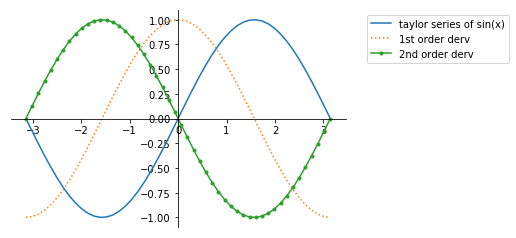

In [139]:
plot_derivatives()

### Problem 8.

In [63]:
from sympy import sin, cos, exp, Matrix
from sympy.abc import x, y
from autograd import jacobian

def more_comparisons():
    X = Matrix([exp(x)*sin(y)+y**3, 3*y - cos(x)])
    Y = Matrix([x, y])

    start = time.clock()
    sym_jacob = X.jacobian(Y)
    sym_jacob = sy.lambdify((x, y), sym_jacob)
    sym_jacob(1,1)
    time_sym = time.clock() - start


    f = lambda x: anp.array([anp.exp(x[0])*anp.sin(x[0]) + x[1]**3,
                             3*x[1] -anp.cos(x[0])])

    start = time.clock()
    jacobian_f = jacobian(f)
    val = jacobian_f(anp.array([1.,1.]))
    time_autograd = time.clock() - start
    
    
    f =lambda x: np.array([np.exp(x[0])*np.sin(x[0]) + x[1]**3,
                             3*x[1] - np.cos(x[0])])
    
    start = time.clock()
    jacob_multi(f, (1.0 ,1.0))
    time_center = time.clock() - start
    
    print('sympy:\t ', time_sym,'\nautograd:', time_autograd,
         '\ncentered:',time_center)
    return  val

In [64]:
more_comparisons()

sympy:	  0.00754709571992862 
autograd: 0.0020536648800089097 
centered: 0.00027978776904546976


array([[ 3.75604923,  3.        ],
       [ 0.84147098,  3.        ]])